# The University of Hong Kong
## DASC7600 Data Science Project 2024
## EDA - HK - Temperature

# Import Modules and Settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import covid_module

# Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data

In [2]:
# Read csv file
# Download URL: https://data.gov.hk/en-data/dataset/hk-hko-rss-daily-temperature-info-hko
# Name: Daily Mean Temperature All Year - Hong Kong Observatory
# Name: Daily Minimum Temperature All Year - Hong Kong Observatory
# Name: Daily Maximum Temperature All Year - Hong Kong Observatory

hk_daily_temp_df = pd.read_csv('./data/raw_data/hk/CLMTEMP_HKO_.csv', skiprows=2)

# Exploratory data analysis for the other 2 csv files can be performed by reading the required csv file
# hk_daily_temp_df = pd.read_csv('./data/raw_data/hk/CLMMINT_HKO_.csv', skiprows=2)
# hk_daily_temp_df = pd.read_csv('./data/raw_data/hk/CLMMAXT_HKO_.csv', skiprows=2)

# Basic Information of Data Set

In [3]:
# Print first 5 records
hk_daily_temp_df.head(5)

,年/Year,月/Month,日/Day,數值/Value,數據完整性/data Completeness
0,1884,3.0,1.0,***,NaN
1,1884,3.0,2.0,***,NaN
2,1884,3.0,3.0,***,NaN
3,1884,3.0,4.0,***,NaN
4,1884,3.0,5.0,***,NaN


In [4]:
# Print last 5 records
hk_daily_temp_df.tail(5)

,年/Year,月/Month,日/Day,數值/Value,數據完整性/data Completeness
48698,2024,6.0,29.0,29.2,C
48699,2024,6.0,30.0,30.3,C
48700,*** 沒有數據/unavailable,NaN,NaN,NaN,NaN
48701,# 數據不完整/data incomplete,NaN,NaN,NaN,NaN
48702,C 數據完整/data Complete,NaN,NaN,NaN,NaN


Missing values are represented by '***' <br>
The column '數據完整性/data Completeness' is an indicator column for data completeness, where the value 'C' represent the data is complete.

In [5]:
# Basic information of dataframe
hk_daily_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48703 entries, 0 to 48702
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   年/Year                   48703 non-null  object 
 1   月/Month                  48700 non-null  float64
 2   日/Day                    48700 non-null  float64
 3   數值/Value                 48700 non-null  object 
 4   數據完整性/data Completeness  48668 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.9+ MB


# Drop Rows

In [6]:
# We only consider records with complete data in this EDA
# Remove records with incomplete data and comment rows
hk_daily_temp_df = hk_daily_temp_df[hk_daily_temp_df['數據完整性/data Completeness'] == 'C']

# Add Date Column

In [7]:
# Combine year, month and day columns
hk_daily_temp_df['report_date'] = hk_daily_temp_df['年/Year'].astype('int').astype('str') \
    + '/' \
    + hk_daily_temp_df['月/Month'].astype('int').astype('str') \
    + '/' \
    + hk_daily_temp_df['日/Day'].astype('int').astype('str')

# Modify Data Type

In [8]:
# Modify data type to datatime
hk_daily_temp_df['report_date'] = pd.to_datetime(hk_daily_temp_df['report_date'])

# Modify data type to float
hk_daily_temp_df['數值/Value'] = hk_daily_temp_df['數值/Value'].astype('float')

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Field - 數值/Value (Temperature)

In [9]:
# Date range of valid temperature 
min_temp, max_temp = hk_daily_temp_df['數值/Value'].agg(['min', 'max']).to_list()
print(f'Min Temperature: {min_temp} (C) degree celsius')
print(f'Max Temperature: {max_temp} (C) degree celsius')

Min Temperature: 1.8 (C) degree celsius
Max Temperature: 32.4 (C) degree celsius


### Field - 年/Year

In [10]:
# Distinct values in year column
print('Distinct values in year column are:',
      str(hk_daily_temp_df['年/Year'].drop_duplicates().sort_values().to_list())[1:-1])

Distinct values in year column are: '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '201

### Field - 月/Month

In [11]:
# Distinct values in month column
print('Distinct values in month column are:',
      str(hk_daily_temp_df['月/Month'].drop_duplicates().sort_values().to_list())[1:-1])

Distinct values in month column are: 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0


### Field - 日/Day

In [12]:
# Distinct values in day column
print('Distinct values in day column are:',
      str(hk_daily_temp_df['日/Day'].drop_duplicates().sort_values().to_list())[1:-1])

Distinct values in day column are: 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0


## Multivariate Analysis

### Fields - 年/Year, 月/Month and 日/Day

In [13]:
# Date range of valid temperature 
min_date, max_date = hk_daily_temp_df['report_date'].agg(['min', 'max']).astype('str').to_list()
print('Date range of valid temperature:')
print(f'Min date: {min_date}')
print(f'Max date: {max_date}')

Date range of valid temperature:
Min date: 1884-04-01
Max date: 2024-06-30


In [14]:
# Dates which are not included in the dataset
hk_daily_temp_df = hk_daily_temp_df.set_index('report_date')
missing_date_index = pd.date_range(start=min_date, end=max_date).difference(hk_daily_temp_df.index).astype('str')

print(f'There are missing dates in the dataset, between {missing_date_index.min()} and {missing_date_index.max()}.')

There are missing dates in the dataset, between 1940-01-01 and 1946-12-31.


Since we will use this temperature dataset for covid-19 analysis, there is fine to have missing values between years 1940 and 1946.

### Fields - 年/Year, 月/Month, 日/Day and 數值/Value

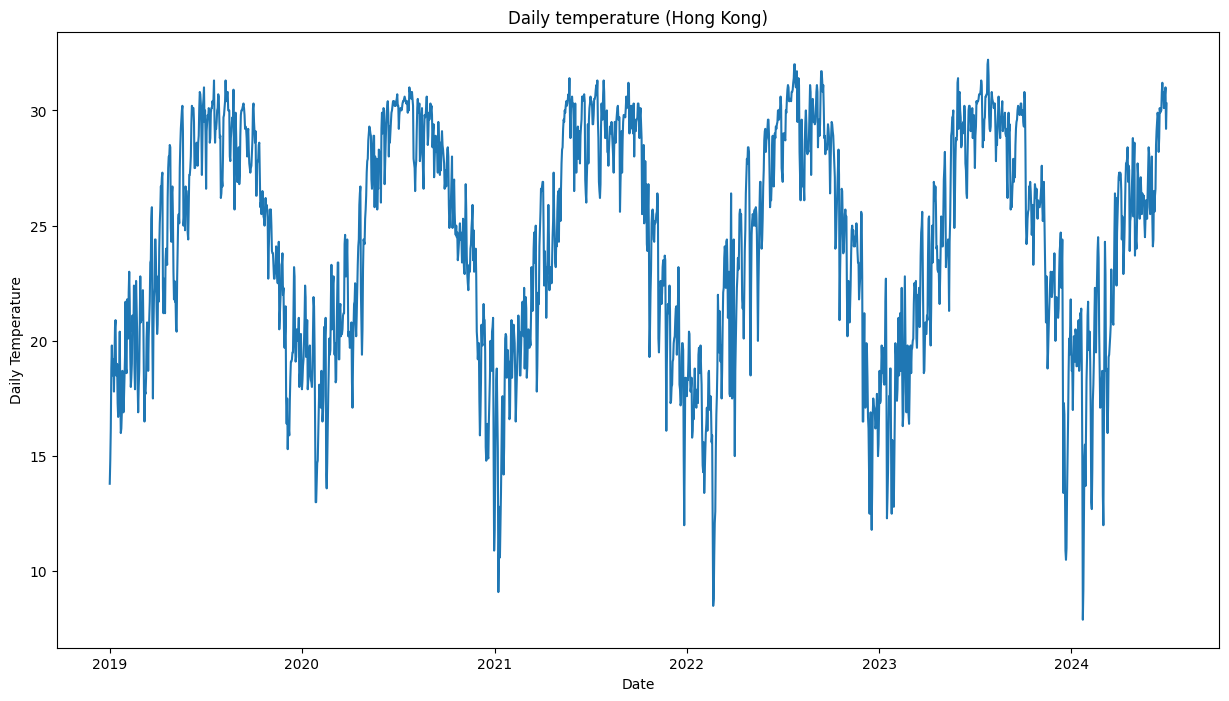

In [15]:
# Line chart - Daily Temperature
hk_daily_temp_from_2019 = hk_daily_temp_df[hk_daily_temp_df.index >= pd.to_datetime('2019-01-01')]

plt.subplots(figsize=(15, 8))
plt.plot(hk_daily_temp_from_2019.index, hk_daily_temp_from_2019['數值/Value'])
plt.title('Daily temperature (Hong Kong)')
plt.xlabel('Date')
plt.ylabel('Daily Temperature')
plt.show()

## Missing Value Analysis

In [16]:
# Number of missing values in each coumns
covid_module.print_missing_val_count(hk_daily_temp_df)

The dataframe does not have missing values.
